# Understanding Descriptive Statistics

Import the necessary libraries here:

In [149]:
# Libraries
import pandas as pd
import numpy as np
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [150]:
# your code here
def rolling_dice(number):
    dice = [1, 2, 3, 4, 5, 6]
    sample = random.choices(dice, k=number)
    return sample

# print(rolling_dice(10))
dice_rolled = rolling_dice(10)
colname = ['Dice Rolled']
df = pd.DataFrame(dice_rolled, columns = colname)
df

,Dice Rolled
0,2
1,3
2,4
3,6
4,6
5,5
6,2
7,5
8,6
9,6


#### 2.- Plot the results sorted by value.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcde2ec6580>]],
      dtype=object)

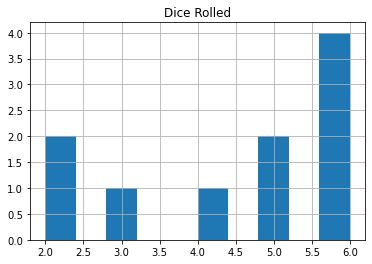

In [151]:
# your code here
import matplotlib

%matplotlib inline

sorted_values = df.sort_values(by = colname, ascending = False)
sorted_values.hist()
# sorted_values.describe()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

{2: 2, 3: 1, 4: 1, 5: 2, 6: 4}


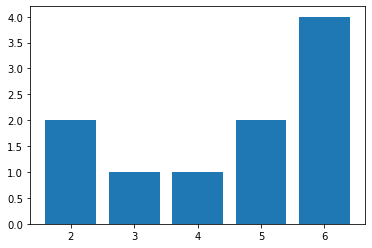

In [220]:
# your code here
import matplotlib.pyplot as plt
def occurences(lst):
    occurences = {}
    for element in lst:
        occurences[element] = lst.count(element)
    return occurences

print(occurences(dice_rolled))
occur = occurences(dice_rolled)
plt.bar(occur.keys(), occur.values())
plt.show()
    

In [157]:
"""
your comments here
Both The histograms looks the same, They test for number of occurences of each key in the dictionary.
In both the plots:
6 occured 4 times,
5 occured twice
4 occured once
3 occured once
2 occured twice
"""

'\nyour comments here\nBoth The histograms looks the same, They test for number of occurences of each key in the dictionary.\nIn both the plots:\n6 occured 4 times,\n5 occured twice\n4 occured once\n3 occured once\n2 occured twice\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [260]:
# your code here
def mean_func(lst):
#     print(f"The List is {lst}")
    total_elements = len(lst)
#     print(f"Total elements in the list are: {total_elements}")
    sum_of_elements = 0
    for element in lst:
#         print(element)
        sum_of_elements += element
#     print(f"Sum of elements are: {sum_of_elements}")
    mean = (sum_of_elements / total_elements)
    return mean
mean_func(dice_rolled)

4.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [261]:
# your code here
mean_func(occurences(dice_rolled))

4.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [262]:
# your code here
import math
def median_func(lst):
    list_length = len(lst)
    if list_length % 2 != 0:
        element = math.floor(list_length / 2)
        median = lst[element]
    else:
        element = math.floor(((list_length / 2) + ((list_length / 2)+1))/2)
        median = lst[element]
    return median
median_func(dice_rolled)

5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [269]:
# your code here
def quartiles(lst):
    lst.sort()
#     print(lst)
    
    list_length = len(lst)
    Q2 = int(median_func(lst))
    if (list_length % 2 == 0):
   # even
       Q1 = median_func(lst[:Q2])
       Q3 = median_func(lst[Q2:])
    else:
   # odd
       Q1 = median_func(lst[:Q2])  # same as even
       Q3 = median_func(lst[Q2+1:])
    
    return (Q1,Q2,Q3)

quartiles(dice_rolled)


(3, 5, 6)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcde27e7f70>]],
      dtype=object)

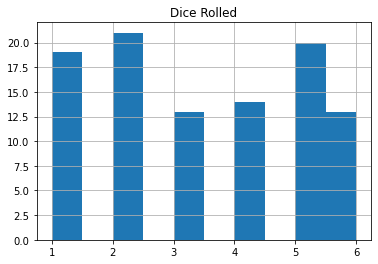

In [163]:
# your code here
dice_rolled_100 = rolling_dice(100)
dice_rolled_100
colname = ['Dice Rolled']
df_100 = pd.DataFrame(dice_rolled_100, columns = colname)
df_100
import matplotlib

%matplotlib inline

sorted_values = df_100.sort_values(by = colname, ascending = False)
sorted_values.hist()

In [166]:
"""
your comments here
The histogram contains all the numbers from 1 to 6 where 
1 as occured 19 times in the list
2 as occured 21 times
3 as occured 13 times
4 as occured 14 times
5 has occured nearly 20 times which is the highest in our list and
finally 6 has occured 13 times in the list
"""

'\nyour comments here\nThe histogram contains all the numbers from 1 to 6 where \n1 as occured 19 times in the list\n2 as occured 21 times\n3 as occured 13 times\n4 as occured 14 times\n5 has occured nearly 20 times which is the highest in our list and\nfinally 6 has occured 13 times in the list\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [167]:
# your code here
mean_func(dice_rolled_100)

The List is [4, 1, 3, 2, 1, 3, 4, 6, 4, 2, 5, 4, 3, 5, 1, 1, 4, 5, 5, 2, 1, 5, 5, 1, 4, 6, 1, 4, 2, 1, 5, 4, 2, 4, 1, 2, 2, 3, 3, 2, 5, 2, 5, 6, 6, 1, 4, 5, 2, 2, 3, 5, 6, 6, 2, 1, 3, 5, 2, 1, 6, 2, 5, 3, 1, 2, 1, 6, 2, 3, 2, 6, 4, 5, 2, 2, 4, 2, 2, 6, 1, 5, 6, 4, 1, 5, 5, 3, 1, 5, 6, 6, 3, 4, 3, 1, 3, 1, 5, 5]
Total elements in the list are: 100
Sum of elements are: 334


3.34

#### 3.- Now, calculate the frequency distribution.


In [168]:
# your code here
occurences(dice_rolled_100)

{4: 14, 1: 19, 3: 13, 2: 21, 6: 13, 5: 20}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

Frequecy distribution: {4: 14, 1: 19, 3: 13, 2: 21, 6: 13, 5: 20}
The List is {4: 14, 1: 19, 3: 13, 2: 21, 6: 13, 5: 20}
Total elements in the list are: 6
Sum of elements are: 21
3.5


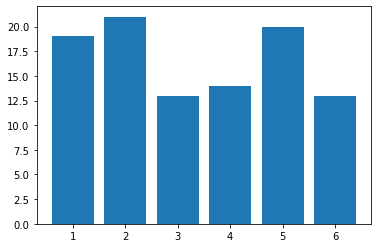

In [185]:
# your code here
print(f"Frequecy distribution: {occurences(dice_rolled_100)}")
occur_100 = occurences(dice_rolled_100)
mean = mean_func(occur_100)
print(mean)
plt.bar(occur_100.keys(), occur_100.values())
plt.show()


In [ ]:
"""
your comments here
From the data I found out the mean value  is 3.5. So the mean value can be plotted at 3.5 in the histogram.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

Frequecy distribution: {3: 170, 5: 175, 2: 167, 4: 170, 6: 166, 1: 152}


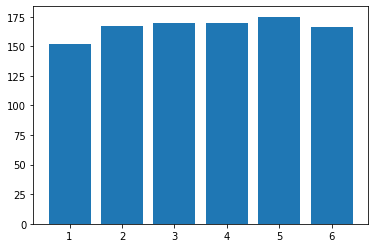

In [186]:
# your code here
dice_rolled_1000 = rolling_dice(1000)
dice_rolled_1000

print(f"Frequecy distribution: {occurences(dice_rolled_1000)}")
occur_1000 = occurences(dice_rolled_1000)
plt.bar(occur_1000.keys(), occur_1000.values())
plt.show()

In [ ]:
"""
your comments here
In the previous histogram we took random values for 100 times but in this histogram we took 1000 times, so the number
of occurences increases.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

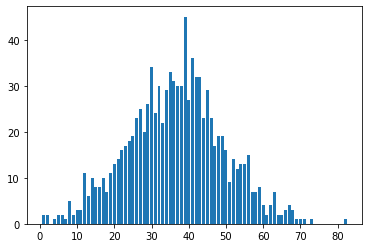

In [225]:
# your code here
age_population = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-2/Descriptive-Stats/data/ages_population.csv')

population_occurence = occurences(age_population['observation'].tolist())
plt.bar(population_occurence.keys(), population_occurence.values())
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [240]:
# your code here
import math
def std_deviation(lst):
    mean = mean_func(lst)
    print(f"mean value is {mean}")
    differences = []
    sum_of_squared_differnces = 0
    number_of_elements = len(lst)
    square_of_differences = []
    
    for element in lst:
        diff = (element - mean)
        differences.append(diff)
        
    for element in differences:
        diff = element ** 2
        square_of_differences.append(diff)
        
    for element in square_of_differences:
        sum_of_squared_differnces += element
    
    variance = (sum_of_squared_differnces) / (number_of_elements - 1)
    std_dev =  math.sqrt(variance)
    
    return std_dev
    
std_deviation(age_population['observation'].tolist())

mean value is 36.56


12.816499625976762

In [241]:
"""
your comments here
I guessed the mean value as 38 but the actual value was 36.56
I guessed the standard deviation as 27 but the actual was 12.81

"""

'\nyour comments here\nI guessed the mean value as 38 but the actual value was 36.56\nI guessed the standard deviation as 27 but the actual was 12.81\n\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

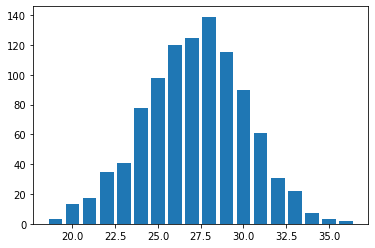

In [243]:
# your code here
age_population2 = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-2/Descriptive-Stats/data/ages_population2.csv')
age_population2

population_occurence2 = occurences(age_population2['observation'].tolist())
plt.bar(population_occurence2.keys(), population_occurence2.values())
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
In step1 the range of values are from 0 to 80 whereas in this the range of values are from 20 to 35.

"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [244]:
# your code here
std_deviation(age_population2['observation'].tolist())

mean value is 27.155


2.969813932689186

In [ ]:
"""
your comments here
The mean value in step 2 was 36.56 and standard deviation was 12.81 whereas the mean value in this is 27.155 and 
standard deviation is 2.96
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

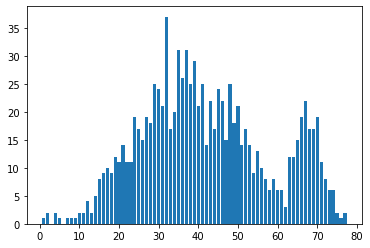

In [264]:
# your code here
age_population3 = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-2/Descriptive-Stats/data/ages_population3.csv')

population_occurence3 = occurences(age_population3['observation'].tolist())
plt.bar(population_occurence3.keys(), population_occurence3.values())
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [265]:
# your code here
std_deviation(age_population3['observation'].tolist())

mean value is 41.989


16.144705959865934

In [266]:
"""
your comments here
the range of values are from 0 to 80 in the plot, 

"""

'\nyour comments here\n\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [273]:
# your code here
# median_func(age_population3['observation'].tolist()) # 32
quartiles(age_population3['observation'].tolist())

(14.0, 40, 41.0)

In [ ]:
"""
your comments here
The mean value for the data is 41.98 whereas the median value for the data is 32 which is a unsorted list 
but for the sorted list the median value is 40.

the difference between mean and median of unsorted list is 9.89
the difference between mean and median of sorted list is 1.89
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [282]:
# your code here
# min+(max-min)*percentile
def percentile(lst):
    min_value = min(lst)
#     print(min_value)
    max_value = max(lst)
#     print(max_value)
    res_25 = min_value+((max_value-min_value)*(3/4))
    res_75 = min_value+((max_value-min_value)*(1/4))
    return res_25, res_75

percentile(age_population3['observation'].tolist())

# age_population3.describe()


(58.0, 20.0)

In [ ]:
"""
your comments here
There are 58 values that are in the range of 25 percentile
Ther are 20 values that are in the 75 percentile
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""